In [1]:
# import modules%pylab inline
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import librosa
import numpy as np
import pandas as pd
from librosa import display

In [2]:
x, sr = librosa.load('KOstock.wav')
print x.shape, sr

(42275,) 22050


In [3]:
ipd.Audio(x, rate=sr)

In [4]:
hop_length = 512
onset_frames = librosa.onset.onset_detect(x, sr=sr, hop_length=hop_length)
print onset_frames # frame numbers of estimated onsets

[ 3  6 10 19 22 27 31 36 39 42 48 54 57 63 70 75]


In [5]:
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)
print onset_times

[0.06965986 0.13931973 0.23219955 0.44117914 0.510839   0.62693878
 0.71981859 0.83591837 0.90557823 0.9752381  1.11455782 1.25387755
 1.32353741 1.46285714 1.62539683 1.7414966 ]


In [6]:
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)
print onset_samples

[ 1536  3072  5120  9728 11264 13824 15872 18432 19968 21504 24576 27648
 29184 32256 35840 38400]


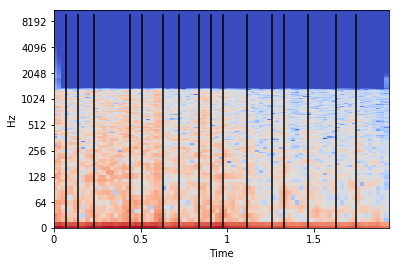

In [7]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='log')
plt.vlines(onset_times, 0, 10000, color='k')

In [8]:
def concatenate_segments(x, onset_samples, pad_duration=0.500):
    """Concatenate segments into one signal."""
    silence = numpy.zeros(int(pad_duration*sr)) # silence
    frame_sz = min(numpy.diff(onset_samples))   # every segment has uniform frame size
    return numpy.concatenate([
        numpy.concatenate([x[i:i+frame_sz], silence]) # pad segment with silence
        for i in onset_samples
    ])

In [9]:

concatenated_signal = concatenate_segments(x, onset_samples, 0.500)

In [10]:
ipd.Audio(concatenated_signal, rate=sr)

In [11]:
onset_frames = librosa.onset.onset_detect(x, sr=sr, hop_length=hop_length, backtrack=True)

In [12]:
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)

In [13]:
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)

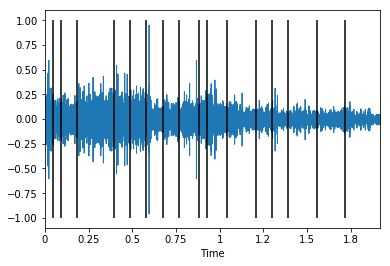

In [14]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')

In [15]:
data = pd.read_csv('daily_adjusted_KO.csv')

In [16]:
data

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2019-05-03,48.60,48.9600,48.5200,48.72,48.7200,7076947,0.0,1.0
1,2019-05-02,48.53,48.7657,48.2700,48.39,48.3900,8724932,0.0,1.0
2,2019-05-01,48.95,49.0750,48.5500,48.59,48.5900,10551594,0.0,1.0
3,2019-04-30,48.53,49.1800,48.3900,49.06,49.0600,17912962,0.0,1.0
4,2019-04-29,48.17,48.4500,48.1100,48.42,48.4200,9731540,0.0,1.0
5,2019-04-26,47.99,48.4500,47.9800,48.26,48.2600,10154302,0.0,1.0
6,2019-04-25,47.74,47.8900,47.4700,47.84,47.8400,11444411,0.0,1.0
7,2019-04-24,48.03,48.2250,47.9150,47.98,47.9800,15997286,0.0,1.0
8,2019-04-23,48.09,48.7200,47.5500,48.21,48.2100,25327963,0.0,1.0
9,2019-04-22,47.40,47.6100,47.0150,47.40,47.4000,9834685,0.0,1.0


In [17]:
close = data["close"]

In [18]:
close

0       48.72
1       48.39
2       48.59
3       49.06
4       48.42
5       48.26
6       47.84
7       47.98
8       48.21
9       47.40
10      47.48
11      47.28
12      46.95
13      47.00
14      46.74
15      46.71
16      46.64
17      46.67
18      46.55
19      46.47
20      46.48
21      46.18
22      46.57
23      46.72
24      46.86
25      46.58
26      46.61
27      46.64
28      46.03
29      45.93
        ...  
5338    68.56
5339    69.25
5340    68.88
5341    67.94
5342    67.38
5343    67.19
5344    67.56
5345    67.06
5346    67.50
5347    66.69
5348    64.75
5349    64.75
5350    64.13
5351    63.25
5352    63.06
5353    63.81
5354    65.44
5355    65.50
5356    65.94
5357    65.00
5358    63.75
5359    64.63
5360    65.38
5361    66.06
5362    64.13
5363    66.63
5364    66.19
5365    66.13
5366    66.44
5367    66.94
Name: close, Length: 5368, dtype: float64

In [19]:
volume = data["volume"]
volume

0        7076947
1        8724932
2       10551594
3       17912962
4        9731540
5       10154302
6       11444411
7       15997286
8       25327963
9        9834685
10      12167116
11      11849263
12      10804647
13      10261724
14      10690040
15       7352467
16       8060254
17       8641776
18       9421519
19       7677796
20       7814918
21      12854520
22       8495331
23      11522684
24      16045553
25      11121067
26      11543630
27      11434888
28      11668222
29      19055939
          ...   
5338     2198100
5339     2935800
5340     2169000
5341     2661700
5342     1776000
5343     2149300
5344     3745300
5345     2990400
5346     3647300
5347     5056100
5348     2497400
5349     3340500
5350     5032300
5351     2834600
5352     2525900
5353     2516900
5354     2723200
5355     2238700
5356     2471000
5357     4108500
5358     2083400
5359     2836600
5360     3200000
5361     4447600
5362     4373600
5363     3161900
5364     2678600
5365     27241

In [20]:
volume.max()

98967500

In [21]:
time = data["timestamp"]
time

0       2019-05-03
1       2019-05-02
2       2019-05-01
3       2019-04-30
4       2019-04-29
5       2019-04-26
6       2019-04-25
7       2019-04-24
8       2019-04-23
9       2019-04-22
10      2019-04-18
11      2019-04-17
12      2019-04-16
13      2019-04-15
14      2019-04-12
15      2019-04-11
16      2019-04-10
17      2019-04-09
18      2019-04-08
19      2019-04-05
20      2019-04-04
21      2019-04-03
22      2019-04-02
23      2019-04-01
24      2019-03-29
25      2019-03-28
26      2019-03-27
27      2019-03-26
28      2019-03-25
29      2019-03-22
           ...    
5338    1998-02-13
5339    1998-02-12
5340    1998-02-11
5341    1998-02-10
5342    1998-02-09
5343    1998-02-06
5344    1998-02-05
5345    1998-02-04
5346    1998-02-03
5347    1998-02-02
5348    1998-01-30
5349    1998-01-29
5350    1998-01-28
5351    1998-01-27
5352    1998-01-26
5353    1998-01-23
5354    1998-01-22
5355    1998-01-21
5356    1998-01-20
5357    1998-01-16
5358    1998-01-15
5359    1998

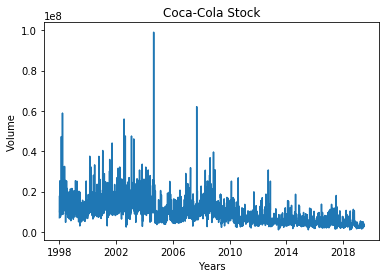

In [29]:
plt.plot(volume)

plt.xticks([tick*1000 for tick in range(0,6)],[z for z in range(1998,2019,4)])

plt.title("Coca-Cola Stock")

plt.xlabel('Years')
plt.ylabel('Volume')

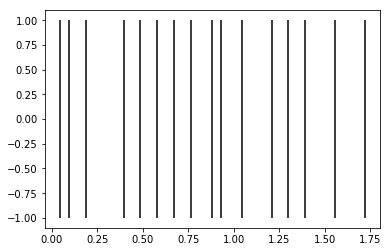

In [23]:
plt.vlines(onset_times, -1, 1, color='k')

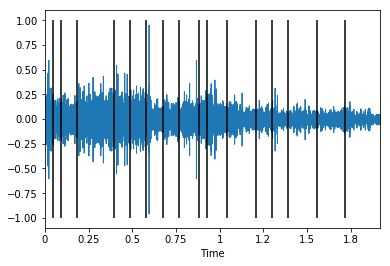

In [24]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')

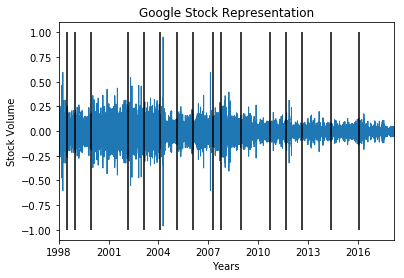

In [25]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')
#plt.xticks(list(range(1998, 2019, 3))) 

yearly_time = ([tick*.0714 for tick in range(0,7)],[z for z in range(1998,2019,3)])

plt.xticks([tick*.285 for tick in range(0,7)],[z for z in range(1998,2019,3)])

plt.title("Google Stock Representation")

plt.xlabel('Years')
plt.ylabel('Stock Volume')

#plt.yticks(list(range(100, 0,-20)))

In [26]:
[z for z in range(1998,2019,3)]

[1998, 2001, 2004, 2007, 2010, 2013, 2016]

In [27]:
[tick*.0714 for tick in range(0,7)]

[0.0, 0.0714, 0.1428, 0.2142, 0.2856, 0.35700000000000004, 0.4284]

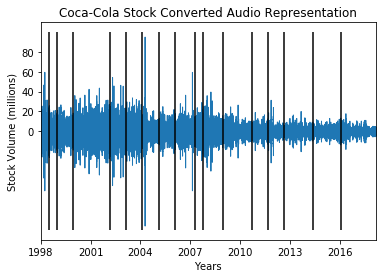

In [28]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')
#plt.xticks(list(range(1998, 2019, 3))) 

yearly_time = ([tick*.0714 for tick in range(0,7)],[z for z in range(1998,2019,3)])

plt.xticks([tick*.285 for tick in range(0,7)],[z for z in range(1998,2019,3)])

#plt.yticks(100, 1000, 500)

#plt.yticks(np.arange(0, 82, step=10))

plt.yticks([tick*.2 for tick in range(0,5)],[z for z in range(0,98,20)])

#max volume of 98,967,500

plt.title("Coca-Cola Stock Converted Audio Representation")

plt.xlabel('Years')
plt.ylabel('Stock Volume (millions)')

#plt.yticks(list(range(100, 0,-20)))

